### Making imports 

In [40]:
import networkx as nx
import numpy as np
import pandas as pd
import operator
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import colorsys
import queue
import community as community_louvain
import matplotlib.cm as cm

### Uploading and Preprocessing Data

In [41]:
explore_data = pd.read_json("events-participants-as-array.json")

In [42]:
explore_data.shape

(4892, 14)

In [43]:
type(explore_data)

pandas.core.frame.DataFrame

In [44]:
explore_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,34,32.0,30.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34,32.0,25.0,21.0,17.0,15.0,10.0,9.0,8.0,7.0,6.0,NaN,NaN,NaN
2,34,32.0,30.0,29.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26,24.0,21.0,17.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26,20.0,14.0,11.0,8.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
with open('events-participants-as-array.json') as json_file:
    graph_data = json.load(json_file)

In [11]:
type(graph_data)

list

In [12]:
print(len(graph_data))
print(graph_data[:2])

4892
[['34', '32', '30', '26'], ['34', '32', '25', '21', '17', '15', '10', '9', '8', '7', '6']]


### Creating Unique Nodes

In [110]:
uniq_nodes = {x for l in graph_data for x in l}

In [108]:
#uniq_nodes_1 = set()
#for l in graph_data: 
    #for x in l:
        #uniq_nodes_1.add(x)

In [16]:
print(len(uniq_nodes))
print(type(uniq_nodes))

70
<class 'set'>


In [12]:
#checking with an alternative code
res=()
for item in graph_data:
    res = list(set(res) | set(item))
print(len(res))

70


In [13]:
#converting set into a list
uniq_nodes_2 = list(uniq_nodes)

In [14]:
print(len(uniq_nodes_2))
print(type(uniq_nodes_2))

70
<class 'list'>


In [15]:
uniq_nodes_2[:10]

['42', '46', '45', '71', '1', '48', '62', '7', '18', '8']

In [49]:
#creating edges on a smaller data set
#edge = [[i[0],j] for i in graph_data2 for j in i[1:]]
#edge

In [ ]:
#edges_graph_data3 = [(graph_data3[i],graph_data3[j]) 
                     #for i in range(len(graph_data3)) for j in range(i+1, len(graph_data3))]

In [ ]:
#rechecking the code above 
#edges = []
#for i in range(len(graph_data3)):
    #for j in range(i+1, len(graph_data3)):
        #edges.append((graph_data3[i],graph_data3[j])) 

### Creating Edges from an Actual Data

In [119]:
type(graph_data)
print(graph_data[:10])

[['34', '32', '30', '26'], ['34', '32', '25', '21', '17', '15', '10', '9', '8', '7', '6'], ['34', '32', '30', '29', '24'], ['26', '24', '21', '17', '3', '2', '1'], ['26', '20', '14', '11', '8', '3', '1'], ['33', '32', '26', '25'], ['32', '37', '31', '25'], ['19', '34', '11', '7'], ['52', '54', '50', '48', '39', '38', '33', '32', '29', '28'], ['54', '47', '39', '36', '34', '33', '27']]


In [122]:
edges_nested = []
for lst in graph_data:
    for i in range(len(lst)):
        for j in range(i+1, len(lst)):
            edges_nested.append((lst[i],lst[j])) 

In [123]:
print(edges_nested[:10])
print(type(edges_nested))
print(len(edges_nested))

[('34', '32'), ('34', '30'), ('34', '26'), ('32', '30'), ('32', '26'), ('30', '26'), ('34', '32'), ('34', '25'), ('34', '21'), ('34', '17')]
<class 'list'>
1533


### Creating Edges per List (meeting)

In [124]:
graph_edges_full = []
graph_edges_partial = []
for item in graph_data:
    for i in range(len(item)):
        for j in range(i+1, len(item)):
            graph_edges_partial.append((item[i],item[j]))
    graph_edges_full.append(graph_edges_partial)
    graph_edges_partial = []
print(len(graph_edges_full))
#print(graph_edges_full)

4892


In [126]:
graph_edges_full[:2]

[[('34', '32'),
  ('34', '30'),
  ('34', '26'),
  ('32', '30'),
  ('32', '26'),
  ('30', '26')],
 [('34', '32'),
  ('34', '25'),
  ('34', '21'),
  ('34', '17'),
  ('34', '15'),
  ('34', '10'),
  ('34', '9'),
  ('34', '8'),
  ('34', '7'),
  ('34', '6'),
  ('32', '25'),
  ('32', '21'),
  ('32', '17'),
  ('32', '15'),
  ('32', '10'),
  ('32', '9'),
  ('32', '8'),
  ('32', '7'),
  ('32', '6'),
  ('25', '21'),
  ('25', '17'),
  ('25', '15'),
  ('25', '10'),
  ('25', '9'),
  ('25', '8'),
  ('25', '7'),
  ('25', '6'),
  ('21', '17'),
  ('21', '15'),
  ('21', '10'),
  ('21', '9'),
  ('21', '8'),
  ('21', '7'),
  ('21', '6'),
  ('17', '15'),
  ('17', '10'),
  ('17', '9'),
  ('17', '8'),
  ('17', '7'),
  ('17', '6'),
  ('15', '10'),
  ('15', '9'),
  ('15', '8'),
  ('15', '7'),
  ('15', '6'),
  ('10', '9'),
  ('10', '8'),
  ('10', '7'),
  ('10', '6'),
  ('9', '8'),
  ('9', '7'),
  ('9', '6'),
  ('8', '7'),
  ('8', '6'),
  ('7', '6')]]

### Counting Edge Weights 

For each meeting
  get all pairs of participants
  if pair is in G.edges:
    increase edge weight by 1
  else
    add edge to graph

In [130]:
G = nx.Graph()

In [131]:
for lst in graph_edges_full:
    for e1, e2 in lst:
        if G.has_edge(e1,e2) :
            G[e1][e2]['weight'] += 1
        else :
            G.add_edge(e1,e2,weight=1)

In [132]:
G.size()

635

In [133]:
G.edges(data=True)

EdgeDataView([('34', '32', {'weight': 7}), ('34', '30', {'weight': 5}), ('34', '26', {'weight': 1}), ('34', '25', {'weight': 3}), ('34', '21', {'weight': 1}), ('34', '17', {'weight': 1}), ('34', '15', {'weight': 2}), ('34', '10', {'weight': 2}), ('34', '9', {'weight': 1}), ('34', '8', {'weight': 3}), ('34', '7', {'weight': 3}), ('34', '6', {'weight': 3}), ('34', '29', {'weight': 5}), ('34', '24', {'weight': 2}), ('34', '19', {'weight': 4}), ('34', '11', {'weight': 1}), ('34', '54', {'weight': 1}), ('34', '47', {'weight': 1}), ('34', '39', {'weight': 1}), ('34', '36', {'weight': 3}), ('34', '33', {'weight': 3}), ('34', '27', {'weight': 2}), ('34', '28', {'weight': 3}), ('34', '23', {'weight': 2}), ('34', '3', {'weight': 3}), ('34', '1', {'weight': 3}), ('34', '46', {'weight': 1}), ('34', '40', {'weight': 1}), ('34', '37', {'weight': 1}), ('34', '20', {'weight': 2}), ('34', '16', {'weight': 3}), ('34', '12', {'weight': 1}), ('34', '14', {'weight': 1}), ('34', '4', {'weight': 1}), ('32', 

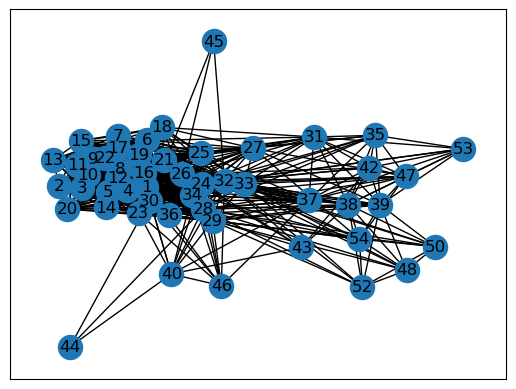

In [134]:
start_pos = nx.spring_layout(G, seed = 100)
nx.draw_networkx(G, pos=start_pos)

### Community Detection

In [31]:
pip install python-louvain

Note: you may need to restart the kernel to use updated packages.


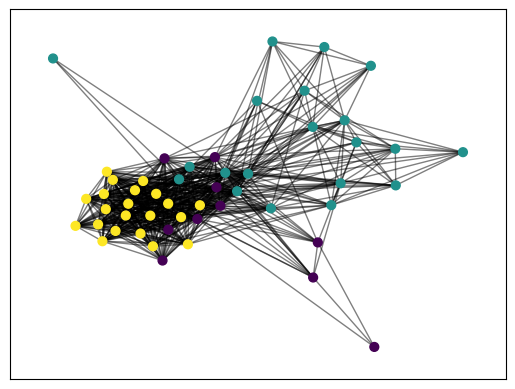

In [135]:
#first compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


In [136]:
partition

{'34': 0,
 '32': 1,
 '30': 0,
 '26': 1,
 '25': 1,
 '21': 2,
 '17': 2,
 '15': 2,
 '10': 2,
 '9': 2,
 '8': 2,
 '7': 2,
 '6': 2,
 '29': 0,
 '24': 0,
 '3': 2,
 '2': 2,
 '1': 2,
 '20': 0,
 '14': 0,
 '11': 2,
 '33': 1,
 '37': 1,
 '31': 1,
 '19': 2,
 '52': 1,
 '54': 1,
 '50': 1,
 '48': 1,
 '39': 1,
 '38': 1,
 '28': 1,
 '47': 1,
 '36': 0,
 '27': 1,
 '23': 2,
 '53': 1,
 '42': 1,
 '35': 1,
 '22': 2,
 '18': 2,
 '13': 2,
 '16': 2,
 '12': 2,
 '5': 2,
 '4': 2,
 '43': 1,
 '46': 0,
 '40': 0,
 '44': 0,
 '45': 1}

In [137]:
res = defaultdict(list)
type(res)

collections.defaultdict

In [138]:
sort_communities = {}
for i, v in partition.items():
    sort_communities[v] = [i] if v not in sort_communities.keys() else sort_communities[v] + [i]

In [140]:
print(len(sort_communities[0]))
print(len(sort_communities[1]))
print(len(sort_communities[2]))

10
20
21


In [55]:
#sort_communities[0]

### Network Centrality. Identifying "Community Cores" and "Bridges"

#### Degree Centrality

In [141]:
#Degree Centrality. This is based on the assumption that important nodes have many connections.
deg_centrality = nx.degree_centrality(G)
print(deg_centrality)

{'34': 0.68, '32': 0.9400000000000001, '30': 0.78, '26': 0.68, '25': 0.62, '21': 0.64, '17': 0.62, '15': 0.58, '10': 0.62, '9': 0.62, '8': 0.6, '7': 0.58, '6': 0.58, '29': 0.66, '24': 0.78, '3': 0.64, '2': 0.58, '1': 0.68, '20': 0.52, '14': 0.56, '11': 0.62, '33': 0.72, '37': 0.36, '31': 0.32, '19': 0.62, '52': 0.18, '54': 0.26, '50': 0.18, '48': 0.18, '39': 0.38, '38': 0.36, '28': 0.8, '47': 0.28, '36': 0.56, '27': 0.44, '23': 0.64, '53': 0.18, '42': 0.22, '35': 0.26, '22': 0.58, '18': 0.56, '13': 0.5, '16': 0.64, '12': 0.66, '5': 0.6, '4': 0.64, '43': 0.14, '46': 0.2, '40': 0.24, '44': 0.06, '45': 0.06}


In [142]:
deg_centrality_sort = sorted(deg_centrality.items(), key=lambda x:x[1], reverse=True)
deg_centrality_sort[:10]

[('32', 0.9400000000000001),
 ('28', 0.8),
 ('30', 0.78),
 ('24', 0.78),
 ('33', 0.72),
 ('34', 0.68),
 ('26', 0.68),
 ('1', 0.68),
 ('29', 0.66),
 ('12', 0.66)]

In [144]:
type(sort_communities[0])

list

#### PageRank

In [145]:
page_rank = nx.pagerank(G,0.4)
page_rank

{'34': 0.022094409819049983,
 '32': 0.03602875962928108,
 '30': 0.027408351516017882,
 '26': 0.02541701242050126,
 '25': 0.019164325190048306,
 '21': 0.021995260333365685,
 '17': 0.019686367485137166,
 '15': 0.01855251694350439,
 '10': 0.02186299662530719,
 '9': 0.022896728854126892,
 '8': 0.02375974970767081,
 '7': 0.018587031341152933,
 '6': 0.019688203251766283,
 '29': 0.02109440518490045,
 '24': 0.026371361819187603,
 '3': 0.01931920681251279,
 '2': 0.01845858274590625,
 '1': 0.025496056106709634,
 '20': 0.016524053089665737,
 '14': 0.020266280684932816,
 '11': 0.020372331435746842,
 '33': 0.02402761345573176,
 '37': 0.017120842621049605,
 '31': 0.017265306578836653,
 '19': 0.020423570911594968,
 '52': 0.014624734990047374,
 '54': 0.016159284890525427,
 '50': 0.014624734990047374,
 '48': 0.014624734990047374,
 '39': 0.01936513325373969,
 '38': 0.01952860803713787,
 '28': 0.026934460794760903,
 '47': 0.015971556335405868,
 '36': 0.018577578228556286,
 '27': 0.017611991419920495,
 '2

In [146]:
#sorted PageRank - top 10
page_rank_sort = sorted(page_rank.items(), key=lambda x:x[1], reverse=True)
page_rank_sort[:10]

[('32', 0.03602875962928108),
 ('30', 0.027408351516017882),
 ('28', 0.026934460794760903),
 ('24', 0.026371361819187603),
 ('1', 0.025496056106709634),
 ('26', 0.02541701242050126),
 ('12', 0.024312399306069793),
 ('33', 0.02402761345573176),
 ('8', 0.02375974970767081),
 ('9', 0.022896728854126892)]

In [147]:
#less important
page_rank_sort_less = sorted(page_rank.items(), key=lambda x:x[1])
page_rank_sort_less[:10]

[('45', 0.012079827088015936),
 ('44', 0.012393547193075068),
 ('46', 0.013380509366364177),
 ('43', 0.013990967657823846),
 ('53', 0.014435408923499834),
 ('52', 0.014624734990047374),
 ('50', 0.014624734990047374),
 ('48', 0.014624734990047374),
 ('35', 0.015618199355346097),
 ('47', 0.015971556335405868)]

#### Closeness Centrality

In [148]:
#Closeness Centrality : This is based on the assumption that important nodes are close to other nodes.
close_centrality = nx.closeness_centrality(G)
print(close_centrality)

{'34': 0.7575757575757576, '32': 0.9433962264150944, '30': 0.819672131147541, '26': 0.7575757575757576, '25': 0.7246376811594203, '21': 0.7352941176470589, '17': 0.7246376811594203, '15': 0.704225352112676, '10': 0.7246376811594203, '9': 0.7246376811594203, '8': 0.7142857142857143, '7': 0.704225352112676, '6': 0.704225352112676, '29': 0.746268656716418, '24': 0.819672131147541, '3': 0.7352941176470589, '2': 0.704225352112676, '1': 0.7575757575757576, '20': 0.6756756756756757, '14': 0.6944444444444444, '11': 0.7246376811594203, '33': 0.78125, '37': 0.6097560975609756, '31': 0.5882352941176471, '19': 0.7246376811594203, '52': 0.5494505494505495, '54': 0.5747126436781609, '50': 0.5494505494505495, '48': 0.5494505494505495, '39': 0.6172839506172839, '38': 0.6097560975609756, '28': 0.8333333333333334, '47': 0.5747126436781609, '36': 0.6944444444444444, '27': 0.6410256410256411, '23': 0.7352941176470589, '53': 0.5434782608695652, '42': 0.5555555555555556, '35': 0.5747126436781609, '22': 0.70

In [149]:
close_centrality_sort = sorted(close_centrality.items(), key=lambda x:x[1], reverse=True)
close_centrality_sort[:10]

[('32', 0.9433962264150944),
 ('28', 0.8333333333333334),
 ('30', 0.819672131147541),
 ('24', 0.819672131147541),
 ('33', 0.78125),
 ('34', 0.7575757575757576),
 ('26', 0.7575757575757576),
 ('1', 0.7575757575757576),
 ('29', 0.746268656716418),
 ('12', 0.746268656716418)]

#### Betweenness Centrality

In [150]:
#Betweenness Centrality: It assumes that important nodes connect other nodes.
bet_centrality = nx.betweenness_centrality(G, normalized = True, 
                                              endpoints = False)
print(bet_centrality)

{'34': 0.018744563157958142, '32': 0.10575127919618305, '30': 0.0457842018291057, '26': 0.027531220977446483, '25': 0.009657458716103682, '21': 0.004505511992553825, '17': 0.0020316718821564834, '15': 0.0010907582788805446, '10': 0.0015977868968324333, '9': 0.00218856763977143, '8': 0.0014715084298263707, '7': 0.0012894355354198476, '6': 0.00387844065119677, '29': 0.03366155416609169, '24': 0.051828789774406935, '3': 0.0018020778439805233, '2': 0.001263875382080726, '1': 0.009505051645968944, '20': 0.000933459477387513, '14': 0.0012644281764223404, '11': 0.0021420643298986236, '33': 0.03646812772935814, '37': 0.009015446005241923, '31': 0.006350435083721501, '19': 0.0016757993769744605, '52': 0.0, '54': 0.002818893125015574, '50': 0.0, '48': 0.0, '39': 0.01032640262232099, '38': 0.011177062166858086, '28': 0.06242493697605835, '47': 0.0031937450304797247, '36': 0.010152444090328871, '27': 0.008507957725532611, '23': 0.00955730419422227, '53': 0.0, '42': 0.0018185941043083903, '35': 0.0

In [151]:
bet_centrality_sort = sorted(bet_centrality.items(), key=lambda x:x[1], reverse=True)
bet_centrality_sort[:10]

[('32', 0.10575127919618305),
 ('28', 0.06242493697605835),
 ('24', 0.051828789774406935),
 ('30', 0.0457842018291057),
 ('33', 0.03646812772935814),
 ('29', 0.03366155416609169),
 ('26', 0.027531220977446483),
 ('34', 0.018744563157958142),
 ('38', 0.011177062166858086),
 ('39', 0.01032640262232099)]

In [ ]:
###

In [153]:
degrees = sorted(G.degree, key=lambda x: x[1], reverse=True)

(-0.8315595650359486,
 1.174039596677624,
 -1.1954956111504105,
 1.0905420830814545)

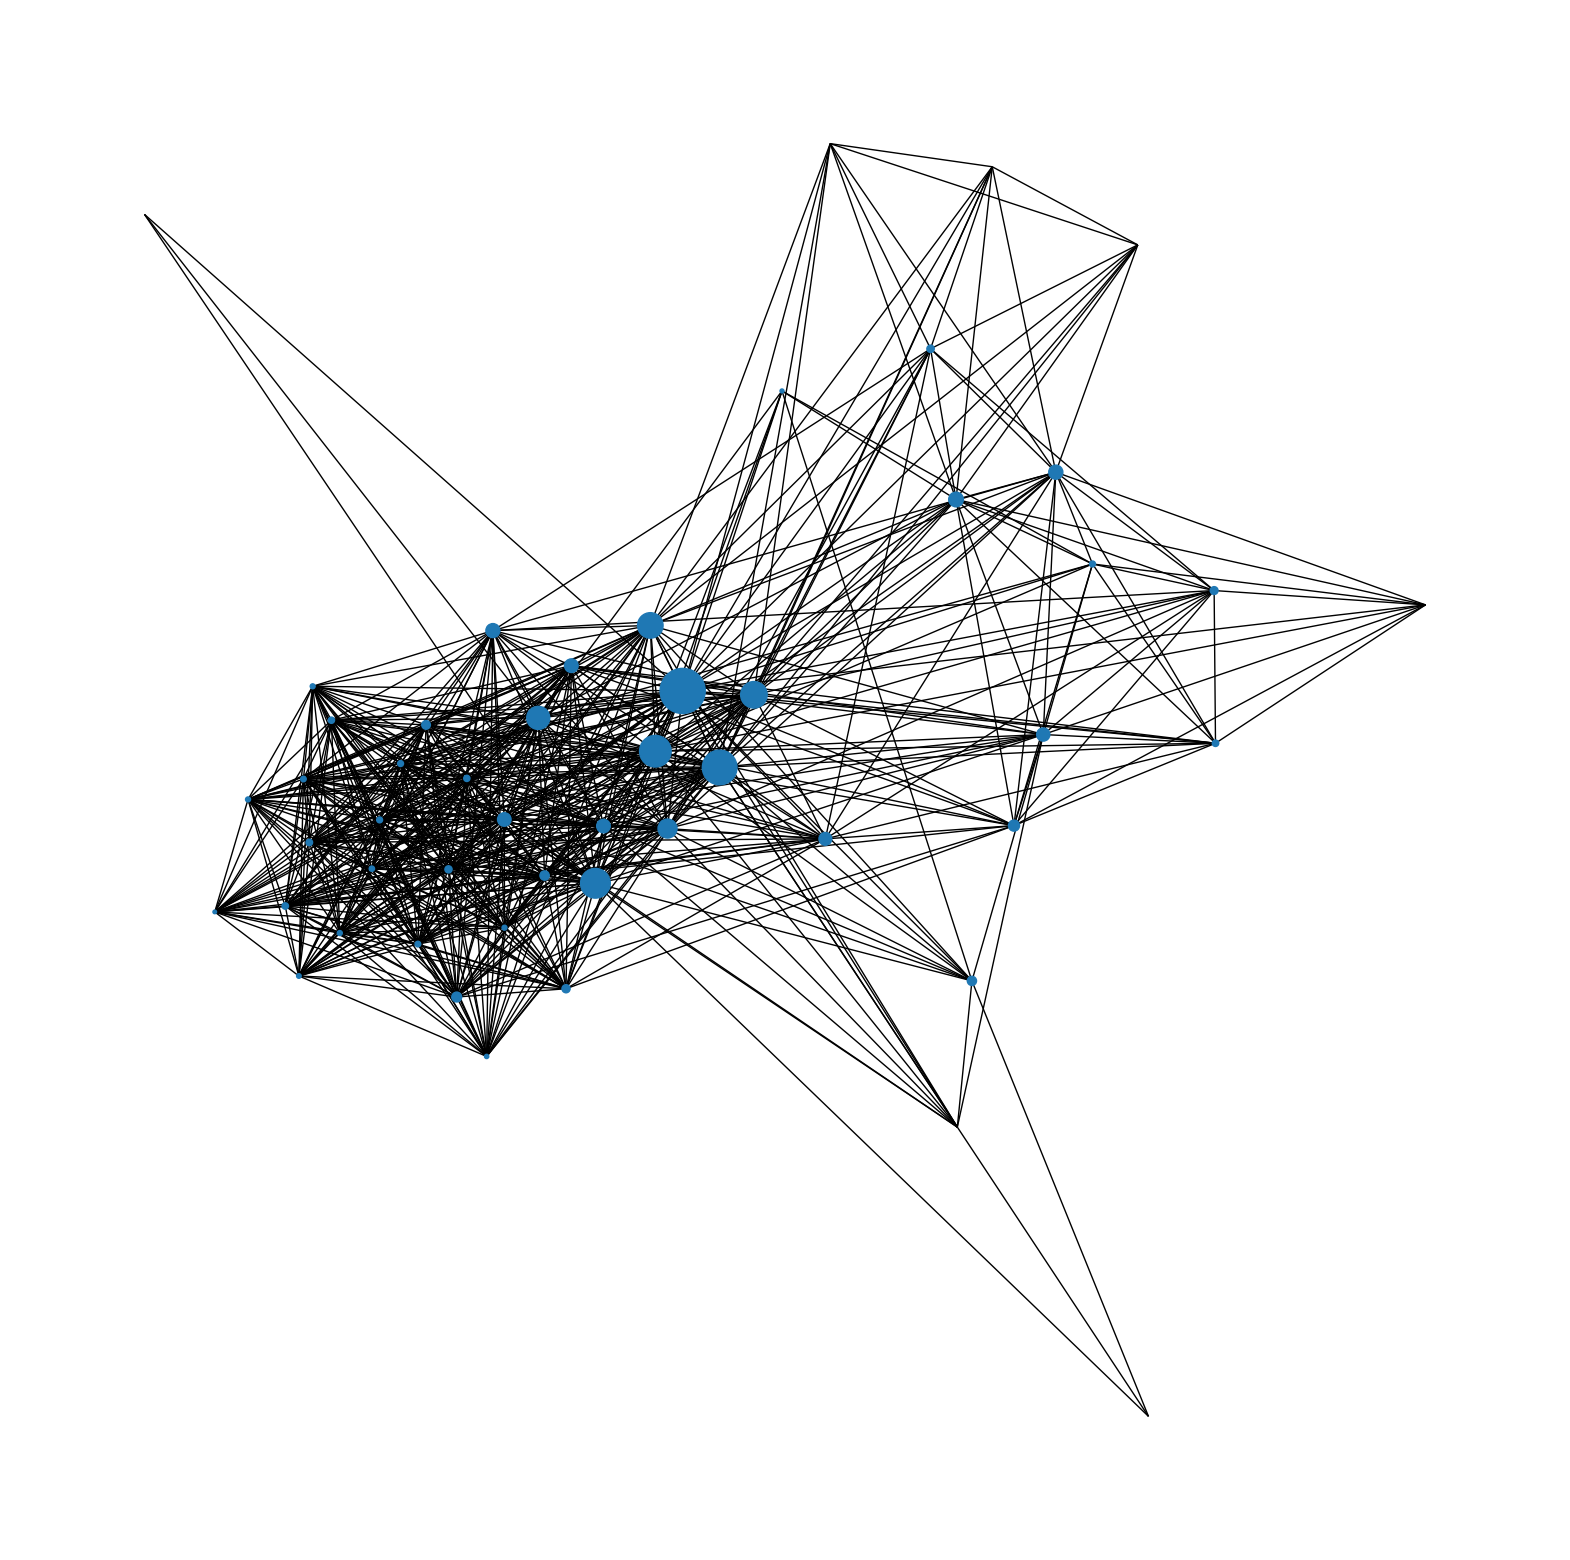

In [155]:
node_size =  [v * 10000 for v in bet_centrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_size=node_size )
plt.axis('off')

In [156]:
#Eigenvector Centrality
eigen_centr = nx.eigenvector_centrality(G)
eigen_centr_sort = sorted(eigen_centr.items(), key=lambda x:x[1], reverse=True)
eigen_centr_sort[:10]

[('32', 0.19675675189436712),
 ('30', 0.19200090630707312),
 ('12', 0.18448294124939912),
 ('28', 0.18209042854745577),
 ('1', 0.1815774316553824),
 ('16', 0.1810655567412376),
 ('3', 0.18106555674123756),
 ('21', 0.17683513638488377),
 ('24', 0.17628051847281298),
 ('10', 0.17573177720964028)]

### Shapely Betweeness

In [157]:
#code borrowed from
#https://medium.com/analytics-vidhya/who-is-the-most-important-person-in-a-social-network-dfcfbb9c3f36 
def ShapelyBetweeness(G):
    #Distance between nodes
    d = np.zeros((G.number_of_nodes(), G.number_of_nodes()))
    #list of predecessors on all node pairs
    Pred_s = [[] for i in range(G.number_of_nodes()) ]
    #Length of shortest path on each pair
    sigma = np.zeros((G.number_of_nodes(), G.number_of_nodes()))
    #One-side dependency of source node on target node
    delta = np.zeros((G.number_of_nodes(), G.number_of_nodes()))
    cSh = np.zeros(G.number_of_nodes()) 
    #Sructs
    Q = queue.Queue()
    S = []
    #Create node list
    nodes = []
    for n in G.nodes.data():
        nodes.append(n[0])
    for s in range(0, G.number_of_nodes()):
        for v in range(0, G.number_of_nodes()):
            Pred_s[v] = []; d[s,v] = float("inf") ;sigma[s,v] = 0
        d[s,s] = 1; sigma[s,s] = 1;  
        Q.put(s)
        while Q.empty() == False:
            v = Q.get()
            S.append(v)
            w = list(G.edges(nodes[v], data=True))
            for i in range(0,len(w)):
                if d[s, nodes.index(w[i][1])] == float("inf"):
                    d[s, nodes.index(w[i][1])] = d[s, v] + 1
                    Q.put(nodes.index(w[i][1]))
                if d[s, nodes.index(w[i][1])] == d[s, v] + 1:
                    sigma[s,nodes.index(w[i][1])] += sigma[s,v]
                    Pred_s[nodes.index(w[i][1])].append(v)

    for v in range(0, G.number_of_nodes()-1):
        delta[s,v] = 0

    while len(S) > 0:
        w = S.pop()
        for v in Pred_s[w]:
            delta[s,v] += (sigma[s,v]/sigma[s,w])*(1/d[s,w] + delta[s,w])
        if w != s:
            cSh[w] += delta[s,w] + (2-d[s,w])/d[s,w]

    for v in range(0, G.number_of_nodes()):
        cSh[v] = cSh[v]/2

    return cSh

In [159]:
Shaply_result = ShapelyBetweeness(G)

In [160]:
type(Shaply_result)

numpy.ndarray

In [161]:
print(Shaply_result)

[  -8.5        4835.36111111 3059.33333333 2405.94444444   -8.5
   -8.5          -8.5          -8.5          -8.5          -8.5
   -8.5          -8.5          -8.5          -8.5          -8.5
   -8.5          -8.5          -8.5          -8.5          -8.5
   -8.5          -8.5          -8.5          -8.5          -8.5
   -8.5          -8.5          -8.5          -8.5          -8.5
   -8.5          -8.5          -8.5          -8.5          -8.5
   -8.5          -8.5          -8.5          -8.5          -8.5
   -8.5          -8.5          -8.5          -8.5          -8.5
   -8.5          -8.5          -8.5          -8.5          -8.5
    0.        ]


In [77]:
#print(ShapelyBetweeness(G_sub))

### Adding Attributes

In [78]:
#G_sub.nodes

In [79]:
nx.set_node_attributes(G_sub, partition, "community")
G_sub.nodes['4594575']["community"]

0

In [80]:
nx.set_node_attributes(G_sub, deg_centrality, "degree")
G_sub.nodes['4594575']["degree"]

0.1587516960651289

In [81]:
nx.set_node_attributes(G_sub, close_centrality, "closeness")
G_sub.nodes['4594575']["closeness"]

0.5

In [82]:
nx.set_node_attributes(G_sub, bet_centrality, "betweenness")
G_sub.nodes['4594575']["betweenness"]

0.004126751925457062

In [83]:
nx.set_node_attributes(G_sub, page_rank, "page_rank")
G_sub.nodes['4594575']["page_rank"]

0.0019938245870157

In [84]:
nx.get_node_attributes(G_sub,"betweenness" )

{'4594575': 0.004126751925457062,
 '9649581': 0.0016674039903506867,
 '3313879': 0.0,
 '6138079': 0.000832180828395297,
 '6524595': 1.8951827141203775e-05,
 '6670222': 1.5947924683829054e-05,
 '6455997': 0.002672567430733187,
 '9582575': 0.002325539334202359,
 '4550719': 0.0005820802801097377,
 '1441624': 0.00129111520276552,
 '6608661': 0.0008892669571426078,
 '6159135': 0.013835227771744792,
 '7690572': 0.0036113536952805227,
 '9087840': 0.0008917810928677603,
 '3803338': 0.002089974352522594,
 '9972486': 0.0012830775410125463,
 '7067231': 0.0004743166528790723,
 '1003825': 0.002260450565759271,
 '6493517': 0.005939584361196965,
 '8503467': 0.0005441809204193607,
 '1865518': 0.004487429127536392,
 '5858806': 0.00129111520276552,
 '8546110': 0.00021809890527413293,
 '2399690': 0.0015595320756976153,
 '8139386': 0.00021809890527413293,
 '5163413': 4.525907517410776e-06,
 '1112599': 0.0005992201556313817,
 '5577398': 0.0004908811047945548,
 '1146339': 0.0012650114754578256,
 '7423418': 

### Plotting 

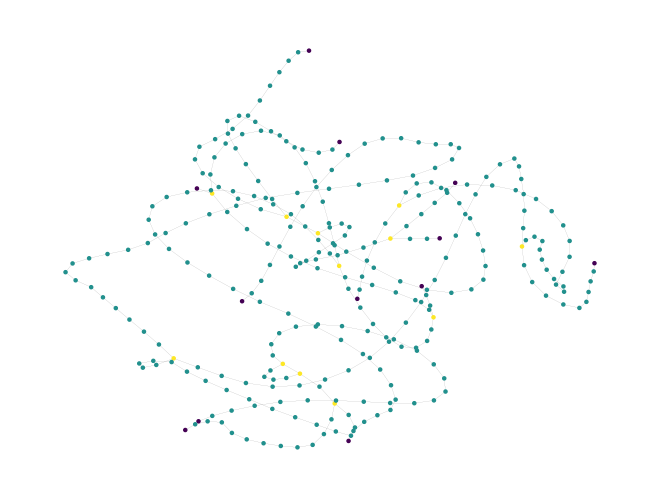

In [90]:
import networkx as nx
import matplotlib.pyplot as plt

sw0 = nx.watts_strogatz_graph(300,3,0.05)
dcent = nx.degree_centrality(sw0)
dcent_color = [dcent[i] for i in range(len(dcent))]
ecent = nx.degree_centrality(sw0)
bcent = nx.betweenness_centrality(sw0)
ccent = nx.closeness_centrality(sw0)

plt.figure(1)
nx.draw(sw0,pos=None,with_labels=False,node_size=5,node_color=dcent_color,width=0.05)
plt.savefig("sw0.png",dpi=500)


In [91]:
type(deg_centrality)

dict

NameError: name 'labels' is not defined

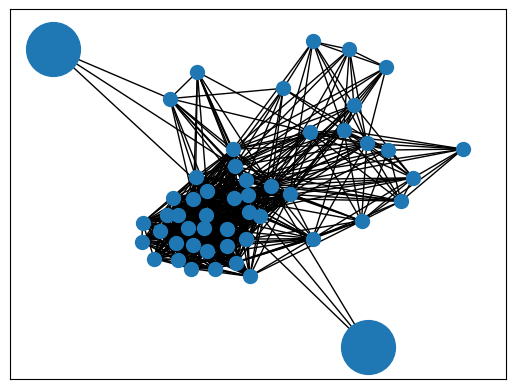

In [162]:
layout = nx.spring_layout(G)
large = []
small = []
d = G.degree(weight='weight')
for node in G:
    if d[node] > 4: 
        large.append(node)
    else:
        small.append(node)
nx.draw_networkx_edges(G, layout)
nx.draw_networkx_nodes(G, layout, nodelist=large, node_size=100)
nx.draw_networkx_nodes(G, layout, nodelist=small, node_size=1500)
nx.draw_networkx_edge_labels(G, layout, edge_labels=labels)
nx.draw_networkx_labels(G, layout, labels=lab_node, font_size=10, font_family='sans-serif')
plt.axis("off")
plt.show()


### Gephi

In [163]:
nx.write_gexf(G, "gephi_updated.gexf")

In [87]:
G_sub_removed = G_sub
G_sub_removed.remove_node('1442662')
G_sub_removed.remove_node('9208595')
G_sub_removed.remove_node('9909304')
G_sub_removed.remove_node('1682770')

In [88]:
nx.write_gexf(G_sub_removed, "gephi_removed.gexf")

In [123]:
G_sub_removed_3 = G_sub_removed
#G_sub_removed_3.remove_node('8480716')
G_sub_removed_3.remove_node('1165624')
G_sub_removed_3.remove_node('6355372')
G_sub_removed_3.remove_node('5316813')

In [124]:
nx.write_gexf(G_sub_removed_3, "gephi_removed_3.gexf")

In [ ]:
#building gephi graph with page rank
#nx.write_gexf(G_sub, "updated_version.gexf")

In [164]:
#G = nx.DiGraph(adjacency_matrix)
#start_pos = nx.spring_layout(G_mat, seed = 100)
labels = nx.get_edge_attributes(G_sub_removed_3,'weight')
nx.draw_networkx_edge_labels(G_sub_removed_3,pos=start_pos,edge_labels=labels)
nx.draw_networkx(G_sub_removed_3, pos=start_pos)



NameError: name 'G_sub_removed_3' is not defined

### Closeness Centrality for Communities #0, 1, 3, 6

In [165]:
#Closeness Centrality for community #0 (121)
sort_communities_0 = {}
for i in sort_communities[0]:
    if i in close_centrality.keys():
        sort_communities_0[i] = close_centrality[i]

In [166]:
sorted(sort_communities_0.items(), key=lambda x:x[1], reverse=True)[:4]

[('30', 0.819672131147541),
 ('24', 0.819672131147541),
 ('34', 0.7575757575757576),
 ('29', 0.746268656716418)]

In [167]:
#Closeness Centrality for community #1 (116)
sort_communities_1 = {}
for i in sort_communities[1]:
    if i in close_centrality.keys():
        sort_communities_1[i] = close_centrality[i]
sorted(sort_communities_1.items(), key=lambda x:x[1], reverse=True)[:4]

[('32', 0.9433962264150944),
 ('28', 0.8333333333333334),
 ('33', 0.78125),
 ('26', 0.7575757575757576)]

In [169]:
#Closeness Centrality for community #3 (143) 
sort_communities_3 = {}
for i in sort_communities[2]:
    if i in close_centrality.keys():
        sort_communities_3[i] = close_centrality[i]
sorted(sort_communities_3.items(), key=lambda x:x[1], reverse=True)[:4]

[('1', 0.7575757575757576),
 ('12', 0.746268656716418),
 ('21', 0.7352941176470589),
 ('3', 0.7352941176470589)]

In [93]:
#Closeness Centrality for community #6 (108) 
sort_communities_6 = {}
for i in sort_communities[6]:
    if i in close_centrality.keys():
        sort_communities_6[i] = close_centrality[i]
sorted(sort_communities_6.items(), key=lambda x:x[1], reverse=True)[:4]

[('1442662', 0.6464912280701754),
 ('9977818', 0.5268048606147248),
 ('5115594', 0.5186488388458832),
 ('1682770', 0.5186488388458832)]

### Degree Centrality for communities #0, 1, 3, 6 

In [95]:
# Degree Centrality for community #0 (121 members)
deg_cent_communities_0 = {}
for i in sort_communities[0]:
    if i in deg_centrality.keys():
        deg_cent_communities_0[i] = deg_centrality[i] 

In [96]:
#sorted deg_cent_communities_0 - top 4 
sorted(deg_cent_communities_0.items(), key=lambda x:x[1], reverse=True)[:4]

[('5316813', 0.28765264586160105),
 ('5766515', 0.24016282225237448),
 ('6159135', 0.23066485753052915),
 ('2446753', 0.22795115332428764)]

In [97]:
print(deg_centrality['4594575'])
print(deg_centrality.get('4594575'))

0.1587516960651289
0.1587516960651289


In [98]:
# Degree Centrality for community #1 (116 members)
deg_cent_communities_1 = {}
for i in sort_communities[1]:
    if i in deg_centrality.keys():
        deg_cent_communities_1[i] = deg_centrality[i] 
sorted(deg_cent_communities_1.items(), key=lambda x:x[1], reverse=True)[:4]

[('9208595', 0.4219810040705563),
 ('3344258', 0.2021709633649932),
 ('5137910', 0.18995929443690637),
 ('3304037', 0.17639077340569875)]

In [99]:
# Degree Centrality for community #3 (143 members)
deg_cent_communities_3 = {}
for i in sort_communities[3]:
    if i in deg_centrality.keys():
        deg_cent_communities_3[i] = deg_centrality[i] 
sorted(deg_cent_communities_3.items(), key=lambda x:x[1], reverse=True)[:4]

[('8480716', 0.3541383989145183),
 ('8788229', 0.20624151967435547),
 ('8962643', 0.175033921302578),
 ('8276042', 0.14925373134328357)]

In [100]:
# Degree Centrality for community #6 (108 members)
deg_cent_communities_6 = {}
for i in sort_communities[6]:
    if i in deg_centrality.keys():
        deg_cent_communities_6[i] = deg_centrality[i] 
sorted(deg_cent_communities_6.items(), key=lambda x:x[1], reverse=True)[:4]

[('1442662', 0.4789687924016282),
 ('1682770', 0.24423337856173674),
 ('8314913', 0.2320217096336499),
 ('2388443', 0.21981004070556306)]

In [101]:
print(len(deg_cent_communities_6))
print(len(sort_communities[6]))

109
109


### Betweenness Centrality for Communities # 0, 1, 3, 6

In [102]:
# Betweenness Centrality for community #0 (121 members) 
betw_cent_communities_0 = {}
for i in sort_communities[0]:
    if i in bet_centrality.keys():
        betw_cent_communities_0[i] = bet_centrality[i] 

In [103]:
#sorted Betweenness Centrality for community #0 - top 4
sorted(betw_cent_communities_0.items(), key=lambda x:x[1], reverse=True)[:4]

[('5316813', 0.017707043134769382),
 ('2998859', 0.016444816797466923),
 ('6159135', 0.013835227771744792),
 ('5766515', 0.01109765233907014)]

In [104]:
print(bet_centrality['9649581'])
print(bet_centrality.get('9649581'))

0.0016674039903506867
0.0016674039903506867


In [105]:
# Betweenness Centrality for community #1 (116 members) 
betw_cent_communities_1 = {}
for i in sort_communities[1]:
    if i in bet_centrality.keys():
        betw_cent_communities_1[i] = bet_centrality[i]
#sorted Betweenness Centrality for community #1 - top 4
sorted(betw_cent_communities_1.items(), key=lambda x:x[1], reverse=True)[:4]

[('9208595', 0.09583329453420684),
 ('5137910', 0.025915199613469924),
 ('7391163', 0.02565245496132463),
 ('4470779', 0.01625941471559962)]

In [106]:
# Betweenness Centrality for community #3 (143 members) 
betw_cent_communities_3 = {}
for i in sort_communities[3]:
    if i in bet_centrality.keys():
        betw_cent_communities_3[i] = bet_centrality[i]
#sorted Betweenness Centrality for community #3 - top 4
sorted(betw_cent_communities_3.items(), key=lambda x:x[1], reverse=True)[:4]

[('8480716', 0.03277587141448449),
 ('8788229', 0.01747114086905078),
 ('8276042', 0.009926687275704579),
 ('2133568', 0.00930861285565559)]

In [107]:
# Betweenness Centrality for community #6 (108 members) 
betw_cent_communities_6 = {}
for i in sort_communities[6]:
    if i in bet_centrality.keys():
        betw_cent_communities_6[i] = bet_centrality[i]
#sorted Betweenness Centrality for community #6 - top 4
sorted(betw_cent_communities_6.items(), key=lambda x:x[1], reverse=True)[:4]

[('1442662', 0.0675156981132638),
 ('5115594', 0.013192011262494021),
 ('1682770', 0.011869809001815244),
 ('8314913', 0.0076664212819926025)]

## Miscellaneous

### Network Centrality. Identifying "Community Cores" and "Bridges"

In [ ]:
#Closeness Centrality : This is based on the assumption that important nodes are close to other nodes.
close_centrality = nx.closeness_centrality(G_sub)
print(close_centrality)

In [ ]:
close_centrality_sort = sorted(close_centrality.items(), key=lambda x:x[1], reverse=True)
close_centrality_sort[:10]

In [ ]:
#Betweenness Centrality: It assumes that important nodes connect other nodes.
bet_centrality = nx.betweenness_centrality(G_sub, normalized = True, 
                                              endpoints = False)
print(bet_centrality)

In [ ]:
bet_centrality_sort = sorted(bet_centrality.items(), key=lambda x:x[1], reverse=True)
bet_centrality_sort[:10]

In [ ]:
degrees = sorted(G_sub.degree, key=lambda x: x[1], reverse=True)

In [ ]:
degrees

In [ ]:
node_size =  [v * 10000 for v in betweennessCentrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_sub, pos=pos, with_labels=False,
                 node_size=node_size )
plt.axis('off')

In [ ]:
eigen_centr = nx.eigenvector_centrality(G_sub)

### Adding Attributes

In [ ]:
#G_sub.nodes

In [ ]:
nx.set_node_attributes(G_sub, partition, "community")
G_sub.nodes['4594575']["community"]

In [ ]:
nx.set_node_attributes(G_sub, deg_centrality, "degree")
G_sub.nodes['4594575']["degree"]

In [ ]:
nx.set_node_attributes(G_sub, close_centrality, "closeness")

In [ ]:
G_sub.nodes['4594575']["closeness"]

In [ ]:
nx.set_node_attributes(G_sub, bet_centrality, "betweenness")

In [ ]:
G_sub.nodes['4594575']["betweenness"]

In [ ]:
nx.set_node_attributes(G_sub, page_rank, "page_rank")

In [ ]:
G_sub.nodes['4594575']["page_rank"]

In [ ]:
nx.get_node_attributes(G_sub,"betweenness" )

### Gephi

In [170]:
pip install GraphiPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.0/177.0 kB 2.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.1/178.1 kB 4.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.3/120.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.2/397.2 kB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 3.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [171]:
pip install gephistreamer

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gephistreamer: filename=GephiStreamer-2.0.3-py3-none-any.whl size=4790 sha256=4528a14dd966360db85315cff87201f6a33a5aadf13efcd2d51eb7203dd82903
  Stored in directory: /Users/naidamuslimova/Library/Caches/pip/wheels/b2/70/df/41ad70bc1425be9e8428018b11d1ad18bb592db255dfe994af
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=f38f4dcc2c5a905c408ce9f740e819d9f20a24816c7733cb3dda7c1071293b81
  Stored in directory: /Users/naidamuslimova/Library/Caches/pip/wheels/e8/9d/fd/0a594a1bc8d493935d319ac40d64d79f5b4117ef4d37b1b678
Successfully built gephistreamer ws4py
Note: you may need to restart the kernel to use updated packages.


In [172]:
from gephistreamer import graph
from gephistreamer import streamer

In [ ]:
nx.write_gexf(G_sub, "test.gexf")

In [ ]:
G_sub.remove_node('1442662')

In [ ]:
G_sub_removed = G_sub

In [ ]:
G_sub_removed.remove_node('9208595')
G_sub_removed.remove_node('9909304')
G_sub_removed.remove_node('1682770')

In [ ]:
len(G_sub_removed.edges)

In [ ]:
G_sub_removed_edges = G_sub_removed

In [ ]:
#Betweenness Centrality for the removed graph
bet_centr_removed = nx.betweenness_centrality(G_sub_removed_edges, normalized = True, 
                                              endpoints = False)

In [ ]:
bet_centr_removed_sort = sorted(bet_centr_removed.items(), key=lambda x:x[1], reverse=True)
bet_centr_removed_sort[:10]

In [ ]:
bet_centrality_sort = sorted(bet_centrality.items(), key=lambda x:x[1], reverse=True)
bet_centrality_sort[:10]

In [ ]:
G_sub_removed.edges

In [ ]:
nx.write_gexf(G_sub_removed, "test_removed.gexf")

In [ ]:
#building gephi graph with page rank
nx.write_gexf(G_sub, "updated_version.gexf")

In [ ]:
dic={}
for i in uniq_nodes_2:
    for j in graph_data:
        if i in j:
            if i in dic:
                dic[i].extend(j)
            else:
                dic[i]=j           